<a href="https://colab.research.google.com/github/weso500/QMLIIOT/blob/main/QSVM_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install qiskit

In [2]:
pip install qiskit-machine-learning

In [3]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import StatevectorSampler as Sampler
from qiskit_machine_learning.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel

dimension = 11
feature_map = ZZFeatureMap(feature_dimension=dimension, reps=2, entanglement="full")

sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)

In [4]:
import pandas as pd
import numpy as np

# Load the training data
train_df = pd.read_csv('/content/drive/MyDrive/QMLIIOT/Train_11.csv')

# Load the test data
test_df = pd.read_csv('/content/drive/MyDrive/QMLIIOT/Test_11.csv')

# Convert training features to numpy array and select 100 samples
train_features = train_df.to_numpy()[:100]

test_features= test_df.to_numpy()
test_features = np.concatenate((test_features[:50], test_features[505:]))

# Create target arrays for training and testing data
test_target = np.concatenate((np.zeros(50), np.ones(5)))

# Ensure arrays are of size samples*8 (assuming 8 is the number of features)
print(f"Shape of train_features: {train_features.shape}")
print(f"Shape of test_features: {test_features.shape}")
print(f"Shape of test_target: {test_target.shape}")

Shape of train_features: (100, 11)
Shape of test_features: (55, 11)
Shape of test_target: (55,)


In [5]:
matrix_train = kernel.evaluate(x_vec=train_features)
matrix_test = kernel.evaluate(x_vec=test_features, y_vec=train_features)

In [6]:
K_train = (matrix_train - matrix_train.mean()) / matrix_train.std()

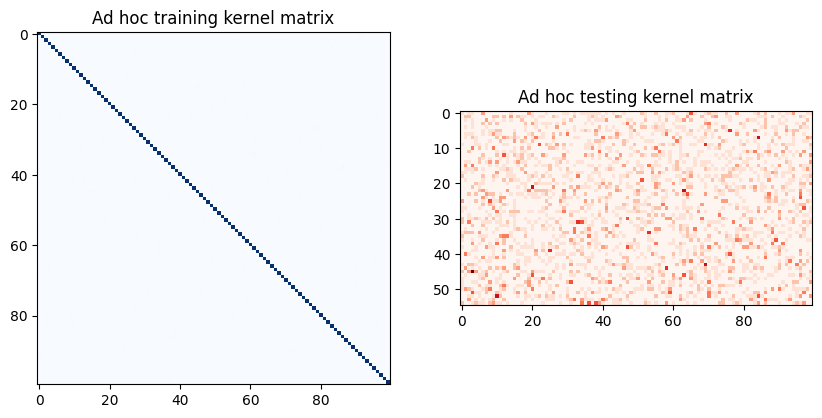

In [7]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(
    np.asmatrix(matrix_train), interpolation="nearest", origin="upper", cmap="Blues"
)
axs[0].set_title("Ad hoc training kernel matrix")

axs[1].imshow(np.asmatrix(matrix_test), interpolation="nearest", origin="upper", cmap="Reds")
axs[1].set_title("Ad hoc testing kernel matrix")

plt.show()

In [8]:
import numpy as np
from sklearn.svm import OneClassSVM
ocsvm = OneClassSVM(kernel='precomputed', nu=0.08)  # nu = anomaly proportion
ocsvm.fit(matrix_train)

OneClassSVM(kernel='precomputed', nu=0.08)

In [12]:
predictions = ocsvm.predict(matrix_test)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1]


In [18]:
scores = ocsvm.decision_function(matrix_test)
print(scores)

[-0.08028358 -0.0805331  -0.08151938 -0.08123454 -0.08161286 -0.08029161
 -0.08083066 -0.07982252 -0.08185164 -0.08020043 -0.08137644 -0.08121652
 -0.07958785 -0.08207582 -0.08144828 -0.08037037 -0.08043227 -0.08106494
 -0.0803729  -0.08137324 -0.08115285 -0.08028493 -0.07934945 -0.08006224
 -0.081312   -0.08067632 -0.08177827 -0.08098247 -0.08028637 -0.08255721
 -0.08029973 -0.08004412 -0.08184065 -0.08034628 -0.08068044 -0.08075522
 -0.08114013 -0.08051189 -0.07990448 -0.08194324 -0.08123845 -0.08137961
 -0.08130883 -0.0805128  -0.08013183 -0.08011701 -0.08068333 -0.08029244
 -0.08028061 -0.08136869 -0.07997016 -0.07965463 -0.08029448 -0.08004917
 -0.07950647]


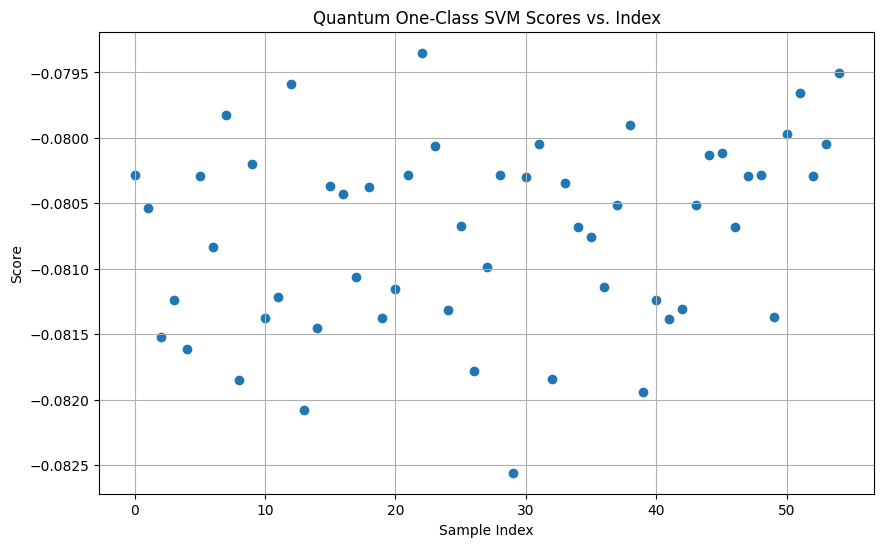

In [20]:
import matplotlib.pyplot as plt

# Create a scatter plot of scores vs. index
plt.figure(figsize=(10, 6))
plt.scatter(range(len(scores)), scores)
plt.title("Quantum One-Class SVM Scores vs. Index")
plt.xlabel("Sample Index")
plt.ylabel("Score")
plt.grid(True)
plt.show()

In [19]:

import numpy as np
import pandas as pd
import pywt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras



fpr, tpr, thresholds = metrics.roc_curve(test_target, scores, pos_label=1)
optimal_idx = np.argmax(tpr - fpr)
loss_threshold = (thresholds[optimal_idx], 6)

auc = metrics.auc(fpr, tpr)
print(auc)


0.8919999999999999


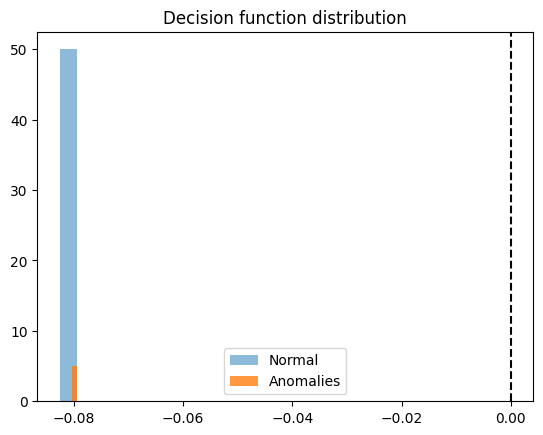

In [23]:
import matplotlib.pyplot as plt

plt.hist(scores[:-5], bins=1, alpha=0.5, label='Normal')
plt.hist(scores[-5:], bins=1, alpha=0.8, label='Anomalies')
plt.axvline(0, color='k', linestyle='--')
plt.legend()
plt.title("Decision function distribution")
plt.show()